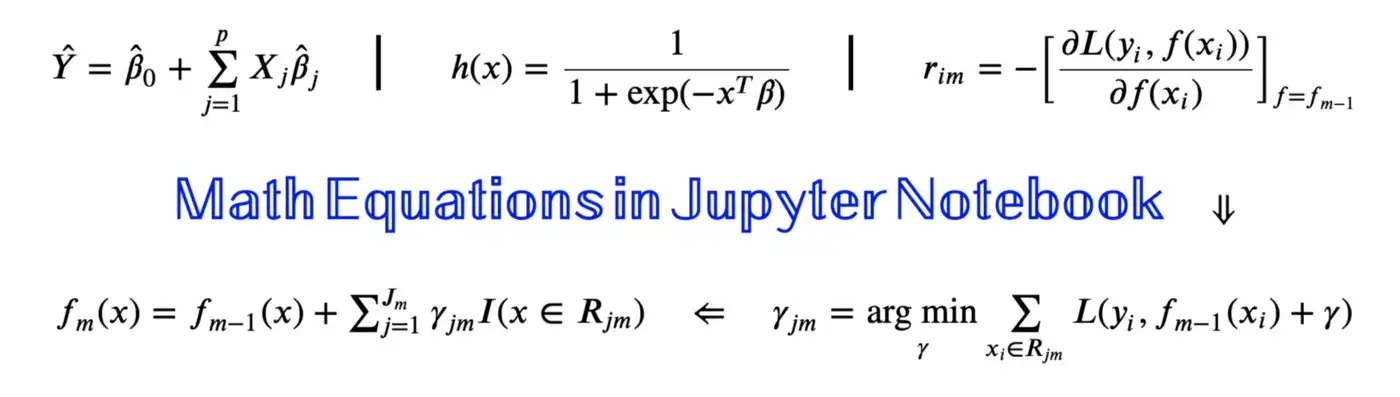

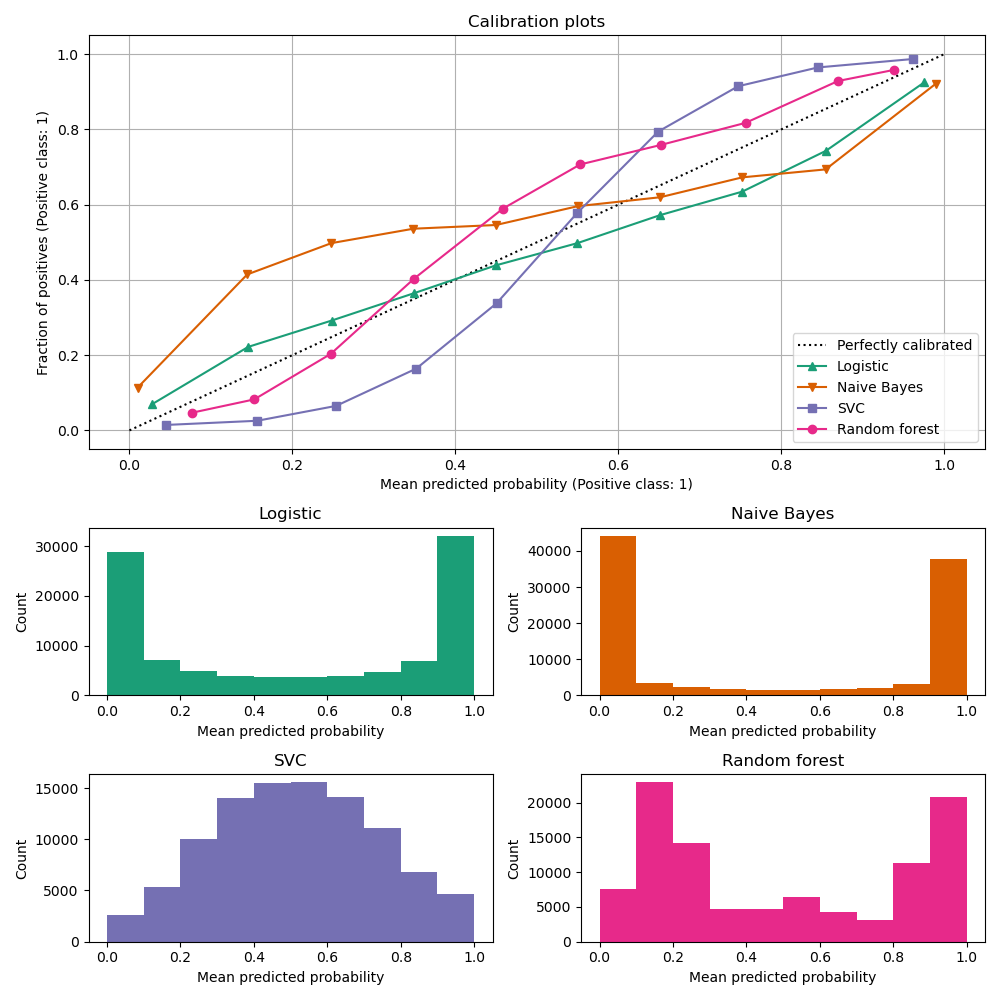

<strong>Content-Based Filtering: </strong>                                                                                                     <br>This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. <br>In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). <br>In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended.

In [12]:
import pandas as pd 
import re 
import numpy as np 
import nltk
from string import punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import pickle
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# <strong> Filter important features and labels

In [13]:
df = pd.read_csv('C:\\Users\\User\Desktop\\Job-recommendation-system-\\backend\\recommender\\resume.csv')
print(df.Category.unique())
important_category = ['Data Science', 'HR', 'Web Designing', 'Java Developer', 'Python Developer', 'Electrical Engineering', 'Database','Network Security Engineer','Testing', 'Business Analyst']
df = df[df.Category.map(lambda x:x in important_category)]


['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


# Step 1: <strong>Preporcessing</strong> stage. 

In [14]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s0-9]' % re.escape(punctuation), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub(r'\b\w\b', '', resumeText)
    return resumeText
# Map the resume to clean the text 
df.Resume = df.Resume.map(cleanResume)

<!-- Linear Model $\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $ -->

# Step 2: <strong>Remove stop words

# Step 3: <strong> Word vectorizer using TfidfVectorizer <br> <br>

In [15]:
stopwords_list = stopwords.words('english')
vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 2),
                     max_features=5000,
                     stop_words=stopwords_list)

In [16]:
sequences = [resume for resume in df.Resume.values]
labels = [label for label in df.Category.values]
vectorizer.fit(sequences)

TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

# <strong>What is TF-IDF?</strong><br>
<strong>Term Frequency - Inverse Document Frequency (TF-IDF)</strong> is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus). Words within a text document are transformed into importance numbers by a text vectorization process. There are many different text vectorization scoring schemes, with TF-IDF being one of the most common.

As its name implies, <br> <strong>TF-IDF vectorizes </strong>/scores  <br>a word by multiplying the word’s Term Frequency (TF) with the Inverse Document Frequency (IDF).

<b>Term Frequency: </b> <br>TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.


<b>Inverse Document Frequency: </b> <br>IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

# <strong> TFIDF = TF * IDF  <br>Numerical Example </strong><br>
Imagine the term 
 appears 20 times in a document that contains a total of 100 words. <br> <strong>Term Frequency (TF) of 
 can be calculated as follow:</strong><br> Assume a collection of related documents contains 10,000 documents. <br>If 100 documents out of 10,000 documents contain the term 
, Inverse Document Frequency (IDF) of 
 can be calculated as follows
<br> $  TF= \frac{20}{100} = 0.2 $ <br> $ IDF = log \frac{10000}{100} = 2 $

<br> $ \textit{TF-IDF} = 0.2 * 2 = 0.4 $

In [17]:
vector_form = vectorizer.transform(sequences)
category = df.Category.unique()
# Category to index mapping
map_index = {catego:index for index, catego in enumerate(category)}
# Index to category mapping 
hashmap = {index:catego for index, catego in enumerate(category)}
df['Category'] = df.Category.map(map_index)


In [18]:
y = df.Category.values

$\mathbf{\text{RandomForest Classifier}}$ <hr><br>The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. <br>It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects<br> the votes from different decision trees to decide the final prediction.

In [24]:
# Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(vector_form, y, test_size = 20, random_state=0)
model = RandomForestClassifier(n_estimators = 10, 
                               criterion = 'entropy', 
                               min_samples_split = 2,
                               max_features = 'log2'
                               )
model.fit(x_train, y_train)
# model.predict(x_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=10)

In [243]:
with open('./saved_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [244]:
with open('./saved_model.pkl', 'rb') as file:
    model = pickle.load(file)
model.predict(x_test)

array([8, 9, 6, 9, 3, 8, 0, 7, 8, 2, 9, 1, 6, 4, 9, 0, 2, 0, 0, 5],
      dtype=int64)

In [245]:
with open('./hashmap.pkl', 'wb') as file:
    pickle.dump(hashmap, file)


In [246]:
with open('./hashmap.pkl', 'rb') as file:
    hashmap = pickle.load(file)
    

In [271]:
with open('./vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
    

In [247]:
hashmap[0]

'Data Science'

In [248]:
hashmap

{0: 'Data Science',
 1: 'HR',
 2: 'Web Designing',
 3: 'Java Developer',
 4: 'Business Analyst',
 5: 'Electrical Engineering',
 6: 'Python Developer',
 7: 'Network Security Engineer',
 8: 'Database',
 9: 'Testing'}

In [283]:
text = """
Bachelor's Degree in a Computer Science or related technical discipline, preferred but not required 
10+ years of experience with Java, HTML (HTML5), CSS, JavaScript, JSON, PL SQL, Eclipse, (Subversion or GitHub) 
Must be able to obtain a Position of Public Trust Clearance
US Citizen or Permanent Resident (Green Card Holder)
The security clearance for this program requires the selected candidate to have resided in the US for the past five years. The selected candidate cannot have left the country for longer than 90 consecutive days and no more than 180 cumulative days. 
Bachelor's Degree in a Computer Science or related technical discipline, preferred but not required
10+ years of experience with Java, HTML(HTML5), CSS, JavaScript, JSON, PL SQL, Eclipse, Subversion or GitHub
Knowledge/experience with Agile Methodologies
Knowledge/experience of SDLC practices
Change Management and Configuration Management (VersionOne, ServiceNow, etc.)
Application Lifecycle Management (ALM)
Desired experience with Unix, Jenkins, Sonar, AppScan, Continuous Integration and Build Automation
Ability to manage development projects from initial conception to production
Strong oral and written communication skills
Work with all levels of the organization, from leadership and senior management to the workforce; interactions may include coaching, interviewing, workshop facilitation and training
Familiarity with Agile/Scrum processes and management tools such as VersionOne
Knowledge of and experience in an IT Service management System (preferably ServiceNow)
 Location:
Remote
Full-flex work week to own your priorities at work and at home
401K with company match 
Internal mobility team dedicated to helping you own your career 
Professional growth opportunities including paid education and certifications
Cutting-edge technology you can learn from 
Rest and recharge with paid vacation and holidays
#gditcareers #java #agile #alm #html5

The likely salary range for this position is $96,000 - $144,000, this is not, however, a guarantee of compensation or salary; rather, salary will be set based on experience, geographic location and possibly contractual requirements and could fall outside of this range.
"""

In [262]:
text = cleanResume(text)
# text

In [263]:
vec_text = np.array(text).reshape(1,)

In [251]:
# text.shape

In [256]:
model.predict(vec_text)

array([1], dtype=int64)

In [288]:
class Preprocessor:
    def __init__(self, description) -> None:
        self.cleaned_text = np.array(self.cleanResume(description)).reshape(1,)
        self.category = self.predictor()
    def cleanResume(self, resumeText):
        resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
        resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
        resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
        resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
        resumeText = re.sub('[%s0-9]' % re.escape(punctuation), ' ', resumeText)  # remove punctuations
        resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
        resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
        resumeText = re.sub(r'\b\w\b', '', resumeText)
        return resumeText
    def predictor(self):
            
        with open('./vectorizer.pkl', 'rb') as file:
            vectorizer = pickle.load(file)
        with open('./saved_model.pkl', 'rb') as file:
            model = pickle.load(file)
        with open('./hashmap.pkl', 'rb') as file:
            hashmap = pickle.load(file)        
            
        sequence = self.cleaned_text
        vector_form = vectorizer.transform(sequence)
        class_type = model.predict(vector_form)
        return hashmap[class_type[0]]

In [268]:
description = """
What is happening guys here. I don't think that this is the problem for delaying the preprocessing stage""" 

In [289]:
# text = np.array(description).reshape(1, )
preprocessor = Preprocessor(text)
preprocessor.category

'HR'

In [ ]:
def similarity(text1, text2):
    document = [text1, text2]
    tfidf = TfidfVectorizer()
    vector = tfidf.fit_transform(document)
    document_similarity = cosine_similarity(vector)
    return document_similarity[0][1]

# <strong>Evaluation</strong> <br>
Evaluation is important for machine learning projects, because it allows to compare objectivelly different algorithms and hyperparameter choices for models. One key aspect of evaluation is to ensure that the trained model generalizes for data it was not trained on, using Cross-validation techniques. We are using here a simple cross-validation approach named holdout, in which a random data sample (20% in this case) are kept aside in the training process, and exclusively used for evaluation. All evaluation metrics reported here are computed using the test set.

Ps. A more robust evaluation approach could be to split train and test sets by a reference date, where the train set is composed by all interactions before that date, and the test set are interactions after that date. For the sake of simplicity, we chose the first random approach for this notebook, but you may want to try the second approach to better simulate how the recsys would perform in production predicting "future" users interactions.

# <strong>Evaluation will continue here 